# Постановка задачи


1. Какая страна лидирует по количеству зарегистрированных наблюдений НЛО?
2. В какие годы наблюдался самый резкий рост числа наблюдений НЛО? 
3. Какова характерная длительность большинства наблюдений?
4. Какие формы объектов чаще всего описываются?


# Подключение библиотек

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [41]:
df = pd.read_excel("5_UFO_sightings_complete.xlsx")

In [42]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Unnamed: 11
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27 00:00:00,29.883056,-97.941111,NaN
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16 00:00:00,29.38421,-98.581082,NaN
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21 00:00:00,53.2,-2.916667,NaN
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17 00:00:00,28.978333,-96.645833,NaN
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22 00:00:00,21.418056,-157.803611,NaN


# Описание данных

- datetime - Дата и время
- city - Город
- state - Штат
- country - Страна
- shape - Форма
- duration (seconds) - Длительность (секунды)
- duration (hours/min) - Длительность (часы/минуты)
- comments - Комментарии
- date posted - Дата публикации
- latitude - Широта
- longitude - Долгота
- Unnamed - Безымянные

In [43]:
df.shape

(88875, 12)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88875 entries, 0 to 88874
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88875 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81356 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88873 non-null  object 
 6   duration (hours/min)  85772 non-null  object 
 7   comments              88749 non-null  object 
 8   date posted           88875 non-null  object 
 9   latitude              88875 non-null  object 
 10  longitude             88875 non-null  float64
 11  Unnamed: 11           196 non-null    float64
dtypes: float64(2), object(10)
memory usage: 8.1+ MB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,88875.0,-84.834334,41.567822,-176.658056,-112.046944,-87.65,-77.615833,178.4419
Unnamed: 11,196.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0000


In [46]:
 df.describe(include="O")

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude
count,88875,88679,81356,76314,85757,88873,85772,88749,88875,88875
unique,76305,22018,68,5,29,544,9700,88348,513,19545
top,2010-07-04 22:00:00,seattle,ca,us,light,300,5 minutes,Fireball,2009-12-12 00:00:00,0
freq,36,570,10450,70293,17872,8796,4796,12,1624,1494


В наборе данных содержится 88875 наблюдений и 12 признаков. Наблюдаются пропущенные и аномальные значения. 

# Разведочный анализ данных (EDA)

### Проверка на пропуски и дубликаты

In [47]:
df.isna().sum()

datetime                    0
city                      196
state                    7519
country                 12561
shape                    3118
duration (seconds)          2
duration (hours/min)     3103
comments                  126
date posted                 0
latitude                    0
longitude                   0
Unnamed: 11             88679
dtype: int64

In [48]:
df=df.drop(["Unnamed: 11"],axis=1)

In [49]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27 00:00:00,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16 00:00:00,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21 00:00:00,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17 00:00:00,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22 00:00:00,21.418056,-157.803611


В столбце "longitude" присутствуют аномальные значения

In [50]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке datetime = 0
Кол-во пропусков в колонке city = 196
Кол-во пропусков в колонке state = 7519
Кол-во пропусков в колонке country = 12561
Кол-во пропусков в колонке shape = 3118
Кол-во пропусков в колонке duration (seconds) = 2
Кол-во пропусков в колонке duration (hours/min) = 3103
Кол-во пропусков в колонке comments = 126
Кол-во пропусков в колонке date posted = 0
Кол-во пропусков в колонке latitude = 0
Кол-во пропусков в колонке longitude = 0


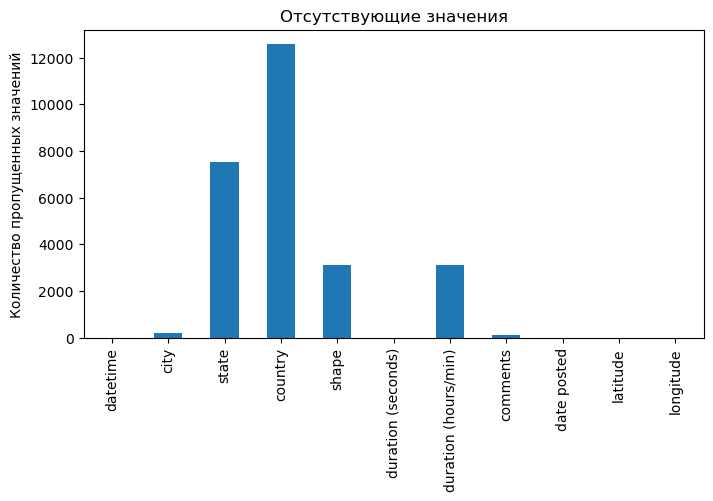

In [51]:
missing_data = df.isna().sum()

missing_data.plot(kind='bar', figsize=(8, 4))
plt.title("Отсутствующие значения")
plt.ylabel("Количество пропущенных значений")
plt.show()

In [52]:
df.duplicated().sum()

np.int64(0)

Дубликаты данных отсутствуют

In [53]:
df = df.dropna()
df.isna().sum()

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
dtype: int64

Теперь отсутствуют пропущенные значения

In [54]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['longitude'], dtype='object')
Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude'],
      dtype='object')


In [55]:
df['longitude'] = df['longitude'].abs()

df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27 00:00:00,29.883056,97.941111
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17 00:00:00,28.978333,96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22 00:00:00,21.418056,157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27 00:00:00,36.595,82.188889
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,1999-10-02 00:00:00,41.1175,73.408333


Исправили аномальные значения в столбце "longitude"

In [56]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')
df["datetime"]=pd.to_datetime(df["datetime"], errors='coerce')
df['date posted'] = pd.to_datetime(df['date posted'], errors='coerce')
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,97.941111
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,82.188889
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.117500,73.408333


Исправили неккоректные значения в столбцах "latitude","duration (seconds)","datetime" и"date posted"

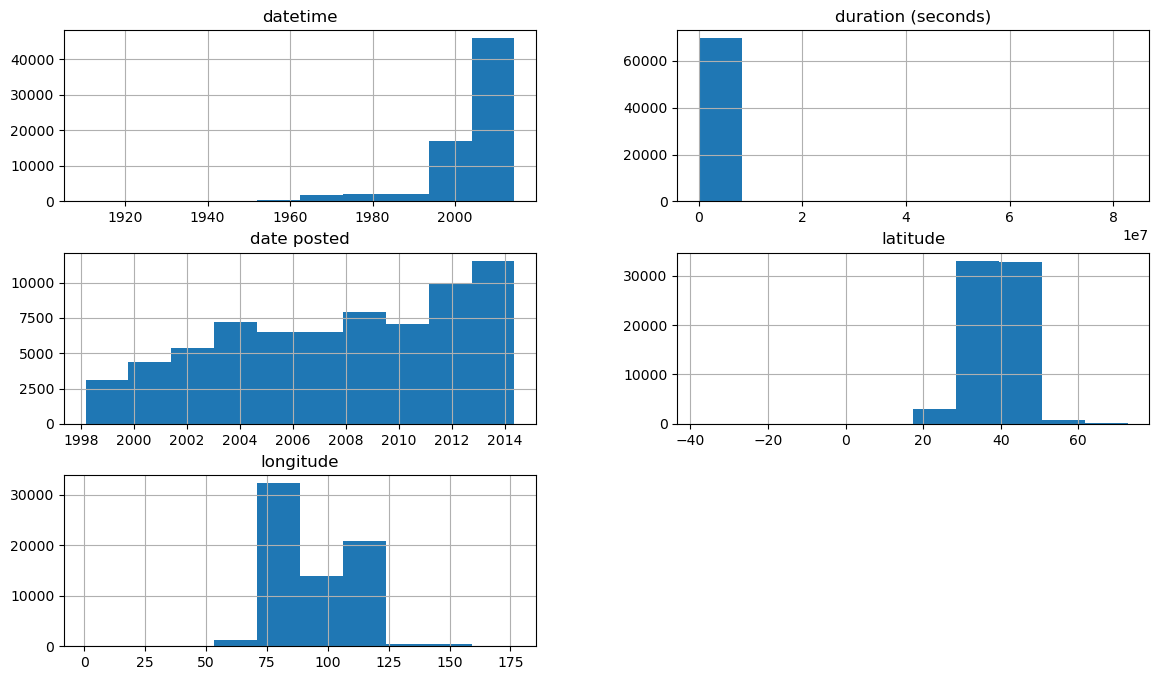

In [57]:
df.hist(figsize=(14,8));

In [58]:
df = df.dropna(subset=['datetime', 'shape', 'latitude', 'longitude']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69528 entries, 0 to 69527
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              69528 non-null  datetime64[ns]
 1   city                  69528 non-null  object        
 2   state                 69528 non-null  object        
 3   country               69528 non-null  object        
 4   shape                 69528 non-null  object        
 5   duration (seconds)    69528 non-null  float64       
 6   duration (hours/min)  69528 non-null  object        
 7   comments              69528 non-null  object        
 8   date posted           69528 non-null  datetime64[ns]
 9   latitude              69528 non-null  float64       
 10  longitude             69528 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 5.8+ MB


Удалили строки, где нет даты, формы, координат

In [59]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,97.941111
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,96.645833
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,157.803611
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,82.188889
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.117500,73.408333


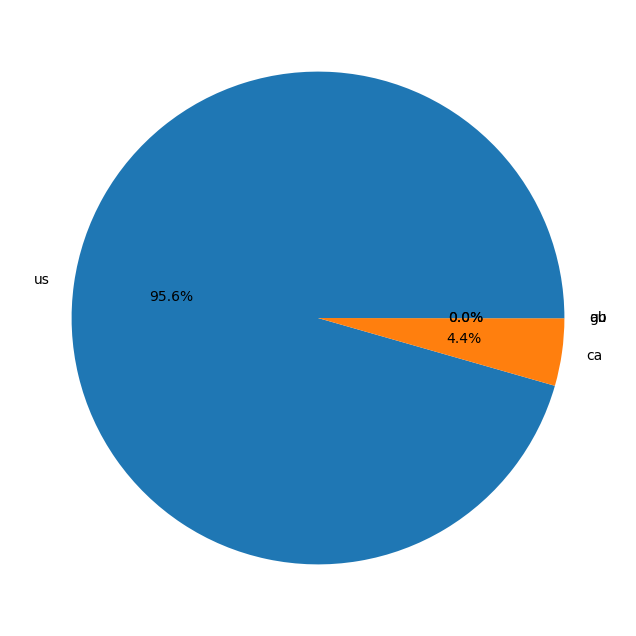

In [80]:
plt.figure(figsize=(14, 8))
plt.pie(df["country"].value_counts(), labels=df["country"].value_counts().index,autopct='%1.1f%%');


Больше всего было замечено НЛО в стране US!

In [61]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

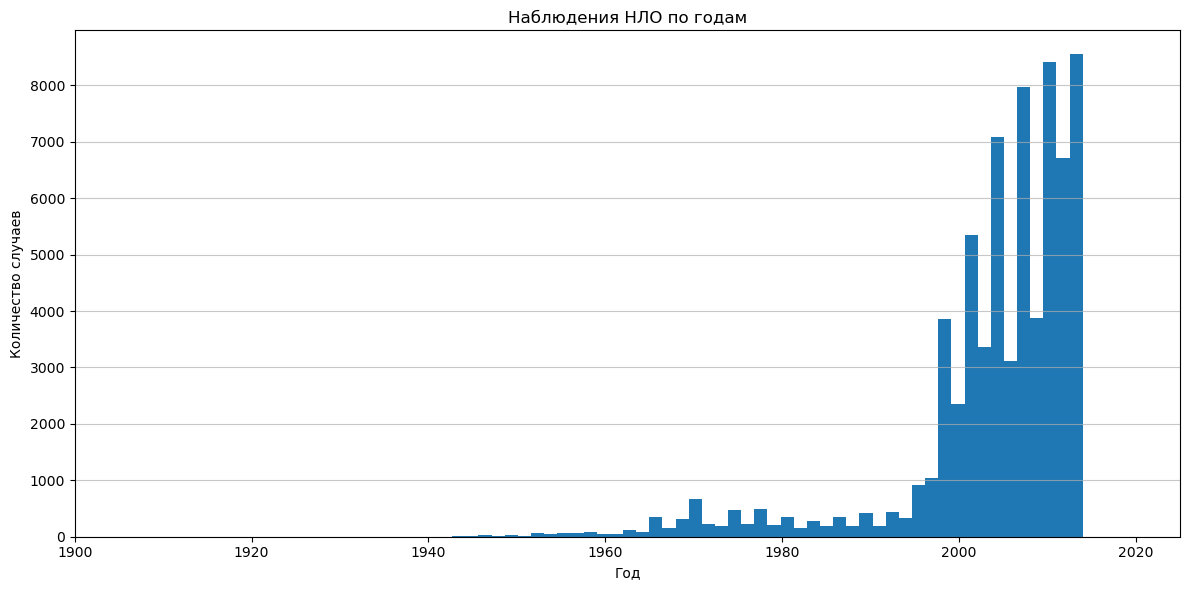

In [62]:
plt.figure(figsize=(12, 6))
df['year'].plot.hist(bins=70)
plt.title('Наблюдения НЛО по годам')
plt.xlabel('Год')
plt.ylabel('Количество случаев')
plt.xlim(1900, 2025)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

Резкий рост числа НЛО наблюдается с ~1990 года

In [63]:
df = df[~df['shape'].isin(['unknown', 'other', ''])]

Удалили данные об объекте, где мало инфоомации

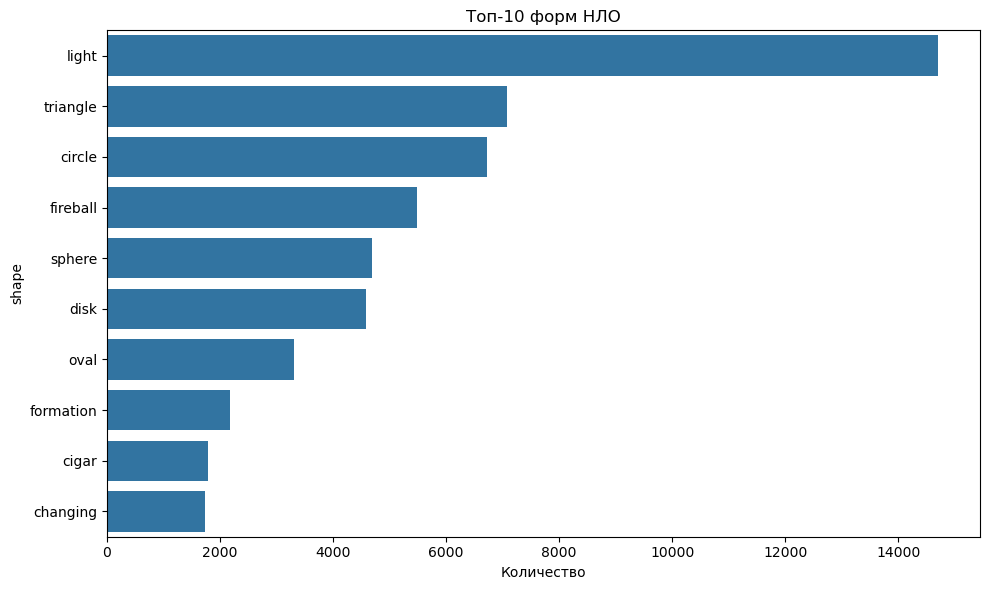

In [64]:
top = df['shape'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top.values, y=top.index)
plt.title('Топ-10 форм НЛО')
plt.xlabel('Количество')
plt.tight_layout()
plt.show()

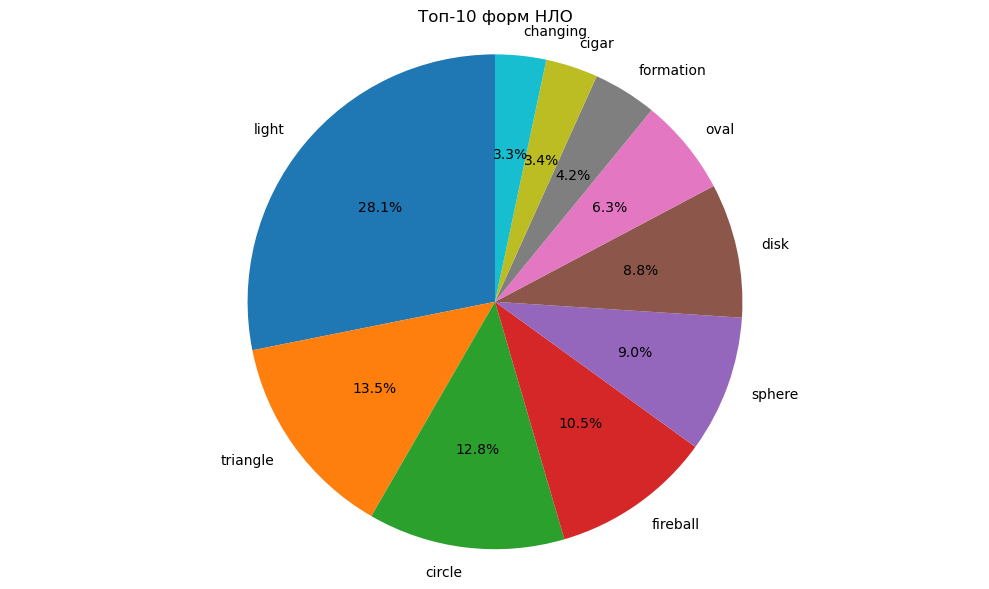

In [65]:
top = df['shape'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top.values, labels=top.index, autopct='%1.1f%%', startangle=90)
plt.title('Топ-10 форм НЛО')
plt.axis('equal')
plt.tight_layout()
plt.show()

Чаще всего встречается форма light объекта

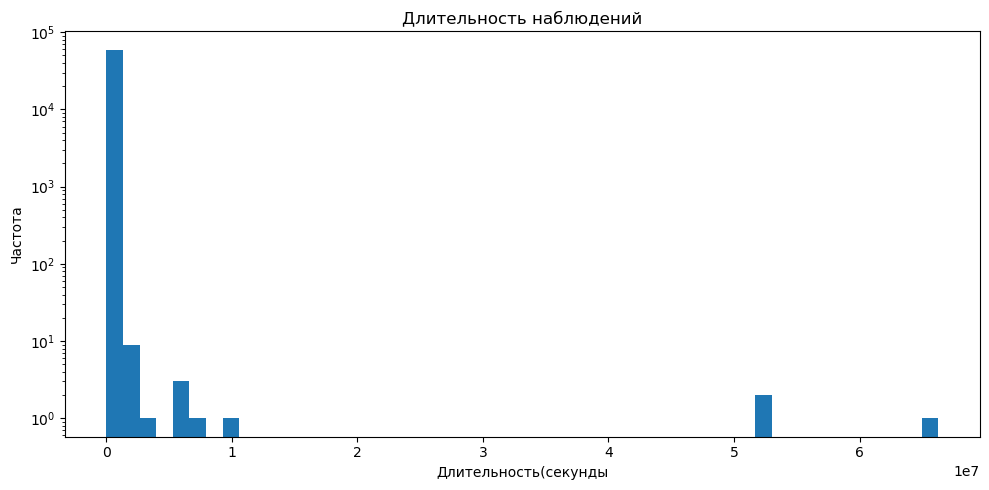

In [66]:
plt.figure(figsize=(10, 5))
plt.hist(df['duration (seconds)'].dropna(), bins=50, log=True)
plt.title('Длительность наблюдений')
plt.xlabel('Длительность(секунды')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

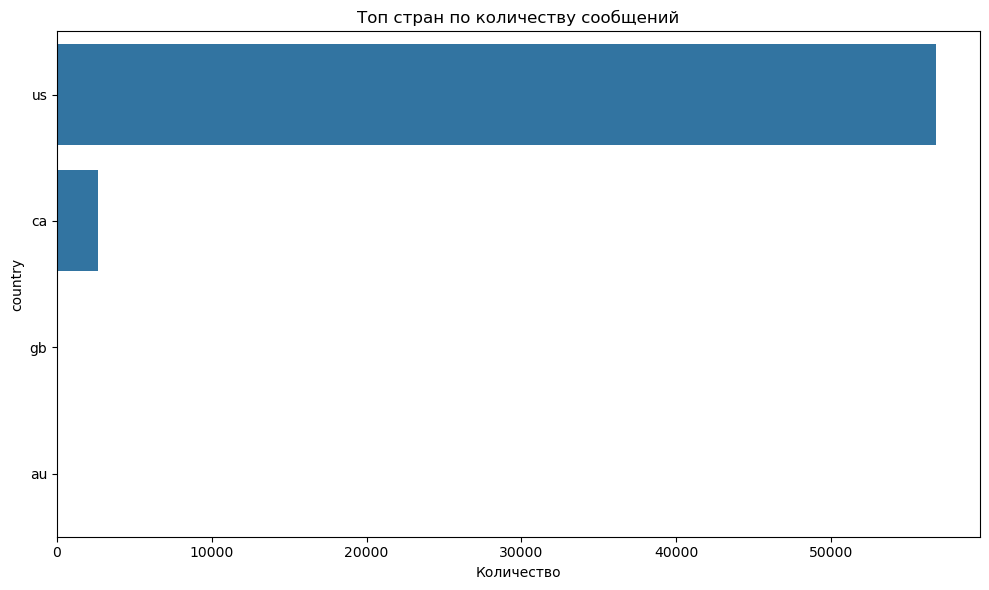

In [73]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Топ стран по количеству сообщений')
plt.xlabel('Количество')
plt.tight_layout()
plt.show()

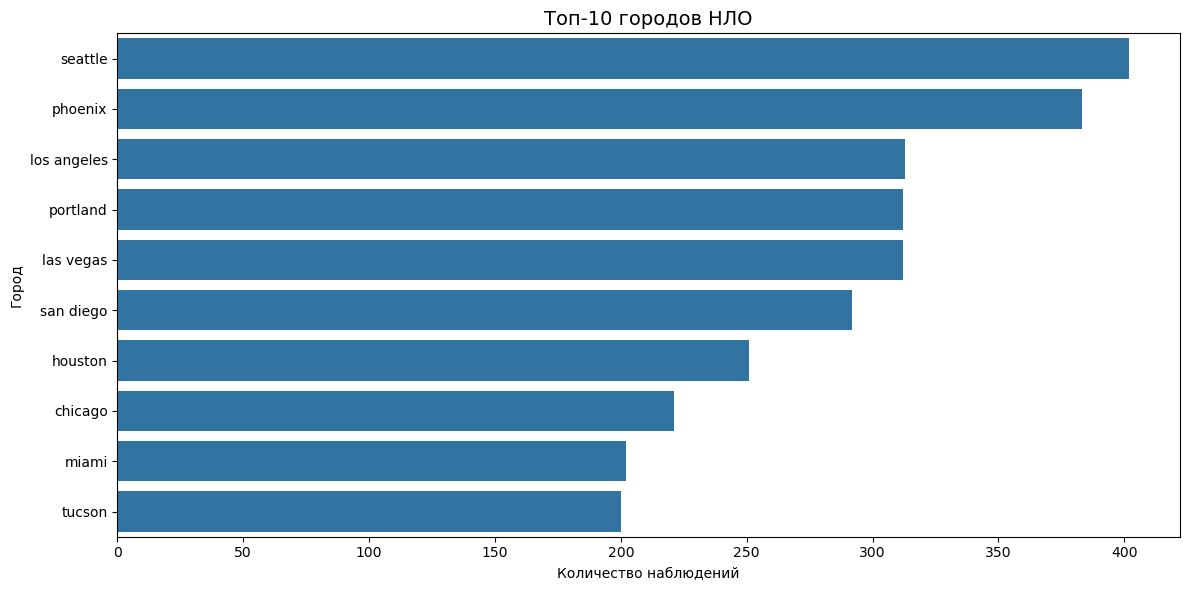

In [75]:
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Топ-10 городов НЛО', fontsize=14)
plt.xlabel('Количество наблюдений')
plt.ylabel('Город')
plt.tight_layout()
plt.show()

Больше всего число наблюдений НЛО в городе seattle

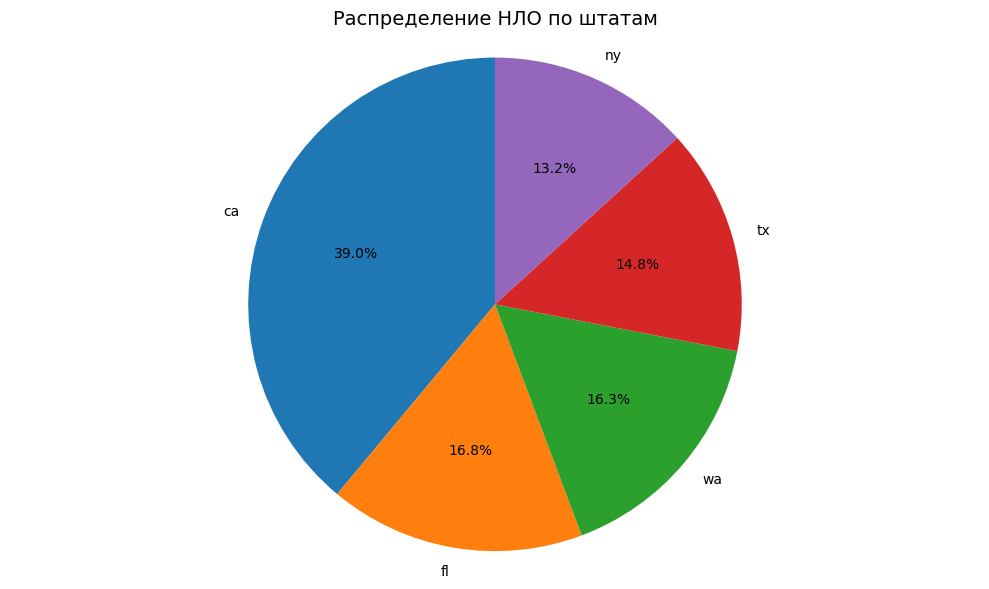

In [85]:
top_states_pie = df['state'].value_counts().head(5)
plt.figure(figsize=(10, 6))
plt.pie(
    top_states_pie,
    labels=top_states_pie.index,
    autopct='%1.1f%%',
    startangle=90,
    
)
plt.title('Распределение НЛО по штатам', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()